In [1]:
import pandas as pd
import plotly.express as px

In [2]:
modalities = ["orf", "crispr"]
labels = ["disease_association", "corum_complex", "wikipathway", "gene-group"]

color_discrete_map = {
    "Matches": "rgb(0, 114, 178)",
    "Non-matches": "rgb(213, 94, 0)",
}

In [3]:
similarity_df = pd.DataFrame()

for modality in modalities:
    for label in labels:
        df = pd.read_csv(
            f"output/{label}-high-similarity-{modality}.csv.gz", compression="gzip"
        ).assign(Retrieval_label=label)
        similarity_df = pd.concat([similarity_df, df], ignore_index=True)

similarity_df.head()

,Cosine_similarity,Pairs,Modality,Retrieval_label
0,0.473831,Matches,ORF,disease_association
1,0.623976,Matches,ORF,disease_association
2,0.447918,Matches,ORF,disease_association
3,0.459904,Matches,ORF,disease_association
4,0.606210,Matches,ORF,disease_association


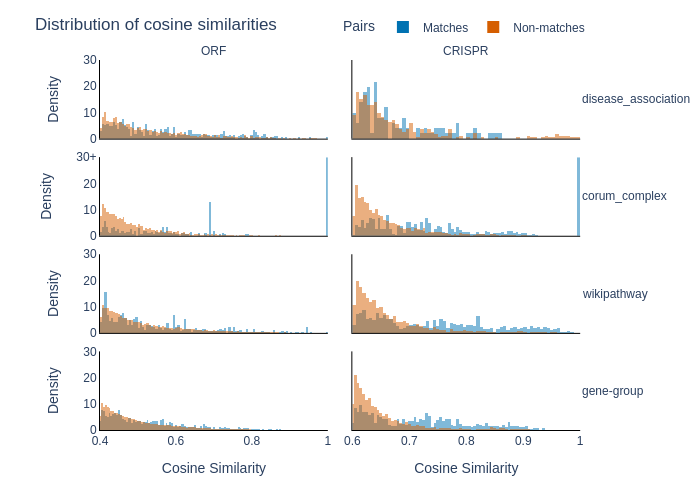

In [4]:
fig = px.histogram(
    similarity_df,
    color="Pairs",
    x="Cosine_similarity",
    facet_row="Retrieval_label",
    facet_col="Modality",
    histnorm="probability density",
    barmode="overlay",
    color_discrete_map=color_discrete_map,
    facet_row_spacing=0.05,
    facet_col_spacing=0.05,
).update_layout(
    title="Distribution of cosine similarities",
    xaxis1=dict(title="Cosine Similarity", linecolor="black", range=[0.4,1]),
    xaxis2=dict(title="Cosine Similarity", linecolor="black", range=[0.6,1]),
    xaxis3=dict(linecolor="black"),
    xaxis4=dict(linecolor="black"),
    xaxis5=dict(linecolor="black"),
    xaxis6=dict(linecolor="black"),
    xaxis7=dict(linecolor="black"),
    xaxis8=dict(linecolor="black"),
    xaxis9=dict(linecolor="black"),
    xaxis10=dict(linecolor="black"),
    yaxis1=dict(title="Density", linecolor="black"),
    yaxis2=dict(linecolor="black"),
    yaxis3=dict(title="Density", linecolor="black"),
    yaxis4=dict(linecolor="black"),
    yaxis5=dict(title="Density", linecolor="black", range=[0,30], tickmode='array', tickvals = [0, 10, 20, 30], ticktext = ['0', '10', '20', '30+']),
    yaxis6=dict(linecolor="black"),
    yaxis7=dict(title="Density", linecolor="black"),
    yaxis8=dict(linecolor="black"),
    yaxis9=dict(title="Density", linecolor="black"),
    yaxis10=dict(linecolor="black"),
    plot_bgcolor="white",
    legend=dict(orientation="h", yanchor="bottom", y=1.05, xanchor="right", x=1),
    margin=dict(l=100, r=110, t=50, b=70)
)

# Remove facet label name

fig.for_each_annotation(lambda a: a.update(text=a.text.replace("Retrieval_label=", "")))
fig.for_each_annotation(lambda a: a.update(text=a.text.replace("Modality=", "")))

# Turn facet label

for annotation in fig['layout']['annotations']: 
    annotation['textangle']= 0

fig.update_xaxes(matches=None)

fig.show("png")
fig.write_image("figures/similarity-histogram-all-orfs-crisprs-high-similarity.png", scale=2)
fig.write_image("figures/similarity-histogram-all-orfs-crisprs-high-similarity.svg", scale=2)